# Analyze your own annotations!

Change the `myUsername` variable below to your Hypothes.is username, and run all the cells below. You may need to install the `wordcloud` library using Anaconda. Usually you can do that by opening a terminal and typing `conda install wordcloud`. 

In [1]:
import requests
import json
import pandas as pd
from time import sleep
import wordcloud
import matplotlib.pyplot as plt
import nltk
import collections
plt.rcParams['figure.figsize'] = [14,6]

In [2]:
myUsername = "JonathanReeve"

In [7]:
textUrls = [f'https://icla2022.jonreeve.com/texts/{text}.html'
            for text in ["moonstone", 'garden-party']]            

def searchHypothesis(url, user=None, limit=200, offset=0):
    """ Query the Hypothes.is API."""
    params = {'url': url,
              'limit': 200,
              'offset': offset}
    if user is not None: 
        params['user'] = user
    response = requests.get('https://hypothes.is/api/search', params=params)
    if not response.ok:
        print('Response not OK!')
        print(response.text)
        return response
    else:
        return response.json()

def getUsers():    
    """ Gets a list of all users who have annotated our texts."""
    users = []
    for textUrl in textUrls:
        parsed = searchHypothesis(textUrl)
        users += [row['user'] for row in parsed['rows']]
    return list(set(users)) 

def getUserAnnotations(user, offset=0):
    """ Get all annotations, including metadata, for a user. """
    rows = []
    for textUrl in textUrls: 
        resp = searchHypothesis(textUrl, user)
        rows += resp['rows']
    return rows   
    
def plotTimes(label, rows):
    times = [pd.to_datetime(row['created']) for row in rows]
    df = pd.DataFrame([1 for i in range(len(times))], index=times, columns=[label])
    df = df.resample('D').sum()
    df.plot(kind='bar')
    return df

def plotUser(username): 
    rows = getUserAnnotations(username)
    df = plotTimes(username, rows)
    return df

def formatUsername(username): 
    return "acct:{}@hypothes.is".format(username)

def getAnnotations(username):
    formattedUsername = formatUsername(username)
    allRows = []
    allTexts = []
    for textUrl in textUrls: 
        pages = getUserAnnotations(formattedUsername, textUrl)
        allTexts += [page['text'] for page in pages]
    return allTexts

def makeWordCloud(username):
    myAnnotations = getAnnotations(username)
    myAnnotationsJoined = '\n'.join(myAnnotations)
    myWordcloud = wordcloud.WordCloud().generate(myAnnotationsJoined)
    plt.imshow(myWordcloud, interpolation='bilinear')
    plt.axis("off")

In [8]:
users = getUsers()

In [10]:
users

['acct:lynnchang@hypothes.is',
 'acct:mleiland@hypothes.is',
 'acct:OliviaWei@hypothes.is',
 'acct:Jeffrey_Fan@hypothes.is',
 'acct:queenielau@hypothes.is',
 'acct:SeunghyeJeon@hypothes.is',
 'acct:samanthareth@hypothes.is',
 'acct:Sean_Fu@hypothes.is',
 'acct:AdityaBhaskar@hypothes.is',
 'acct:YinuoLiu@hypothes.is',
 'acct:itsFang@hypothes.is',
 'acct:PranavSukumar@hypothes.is',
 'acct:Yifan_Song@hypothes.is',
 'acct:Wooheum_Xin@hypothes.is',
 'acct:Lucia2002@hypothes.is',
 'acct:doubleyyh@hypothes.is',
 'acct:eugenechao@hypothes.is',
 'acct:XiaoruiLiu@hypothes.is',
 'acct:ZhidiXu@hypothes.is',
 'acct:danicachen@hypothes.is',
 'acct:Saanvi.Nandanwar@hypothes.is',
 'acct:CassandraCalciano@hypothes.is',
 'acct:christinekimmm@hypothes.is',
 'acct:jaysahaym@hypothes.is',
 'acct:bryanjskim@hypothes.is']

acct:lynnchang@hypothes.is    24
dtype: int64

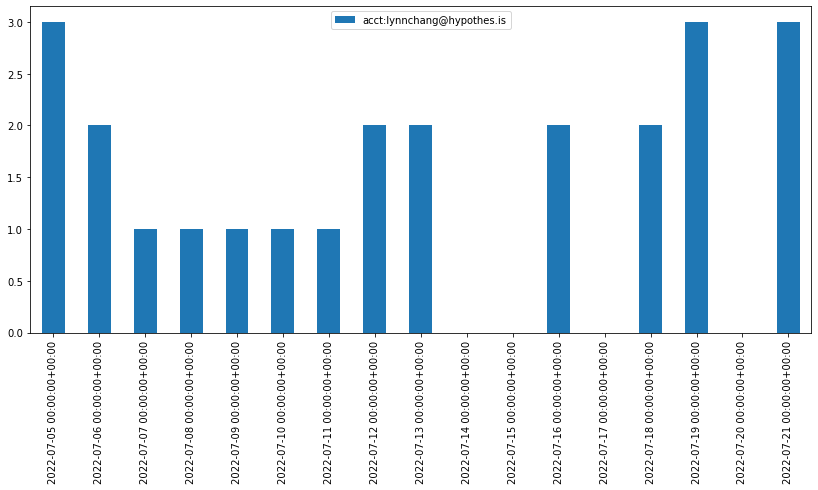

In [11]:
plotUser(users[0]).sum()

acct:lynnchang@hypothes.is    24
dtype: int64
acct:mleiland@hypothes.is    40
dtype: int64
acct:OliviaWei@hypothes.is    20
dtype: int64
acct:Jeffrey_Fan@hypothes.is    16
dtype: int64
acct:queenielau@hypothes.is    23
dtype: int64
acct:SeunghyeJeon@hypothes.is    11
dtype: int64
acct:samanthareth@hypothes.is    22
dtype: int64
acct:Sean_Fu@hypothes.is    26
dtype: int64
acct:AdityaBhaskar@hypothes.is    13
dtype: int64
acct:YinuoLiu@hypothes.is    27
dtype: int64
acct:itsFang@hypothes.is    18
dtype: int64
acct:PranavSukumar@hypothes.is    14
dtype: int64
acct:Yifan_Song@hypothes.is    27
dtype: int64
acct:Wooheum_Xin@hypothes.is    23
dtype: int64
acct:Lucia2002@hypothes.is    15
dtype: int64
acct:doubleyyh@hypothes.is    12
dtype: int64
acct:eugenechao@hypothes.is    10
dtype: int64
acct:XiaoruiLiu@hypothes.is    34
dtype: int64
acct:ZhidiXu@hypothes.is    9
dtype: int64
acct:danicachen@hypothes.is    32
dtype: int64


/nix/store/6k31lwd3mzcm5baspk6bvgvl580s2n52-python3-3.9.12-env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


acct:Saanvi.Nandanwar@hypothes.is    22
dtype: int64
acct:CassandraCalciano@hypothes.is    37
dtype: int64
acct:christinekimmm@hypothes.is    6
dtype: int64
acct:jaysahaym@hypothes.is    27
dtype: int64
acct:bryanjskim@hypothes.is    26
dtype: int64


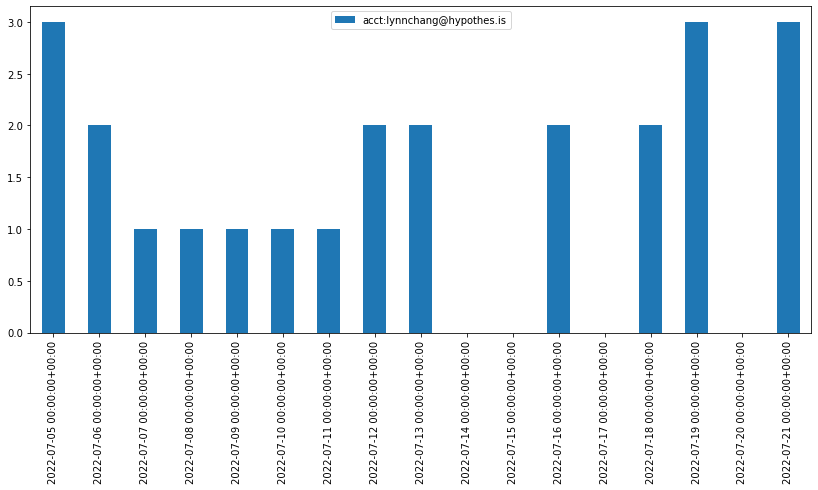

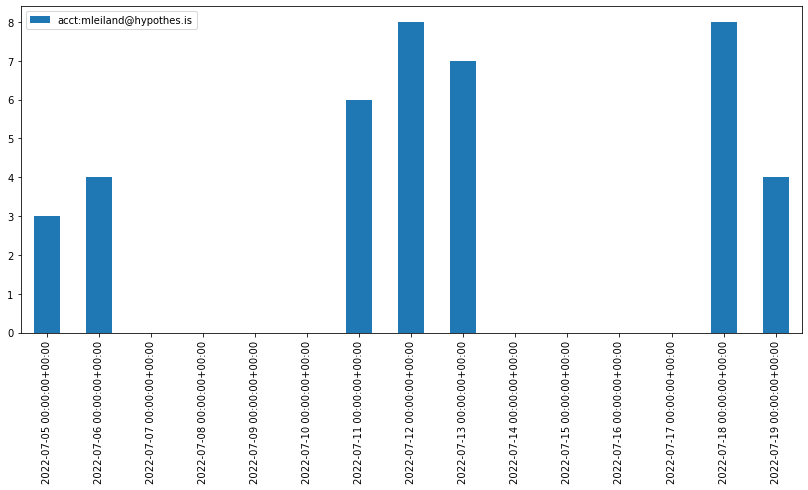

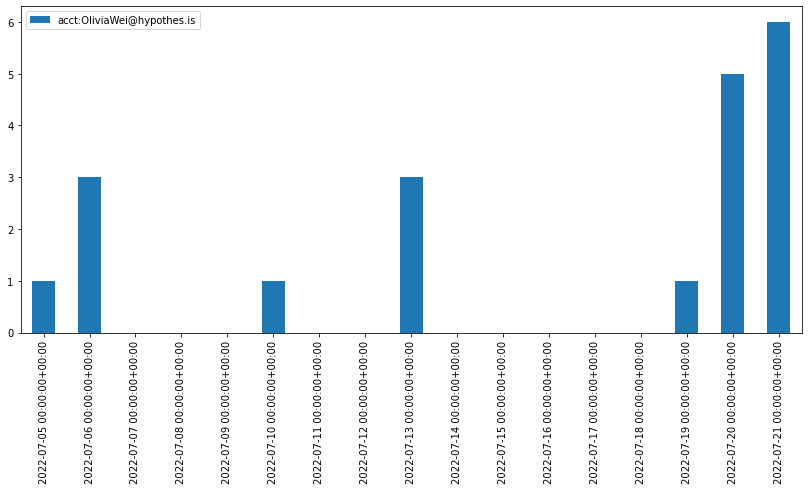

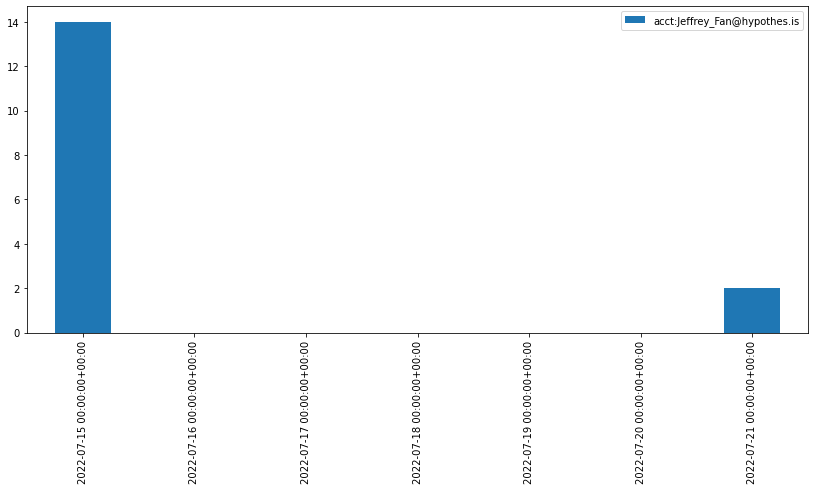

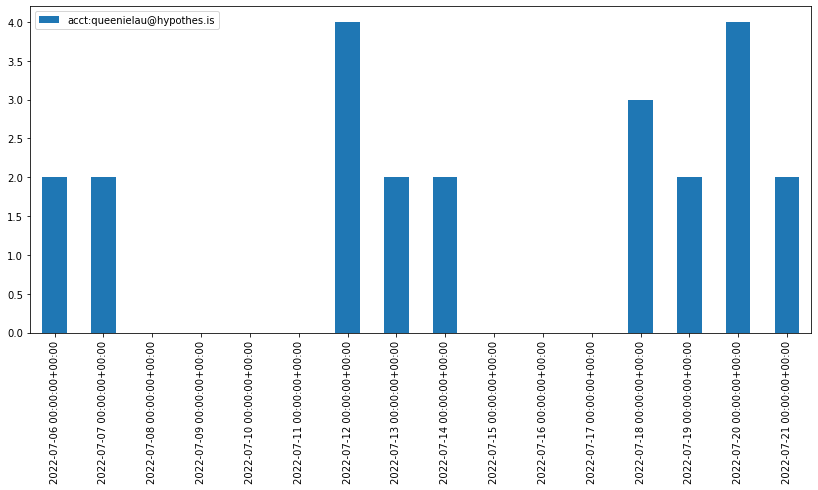

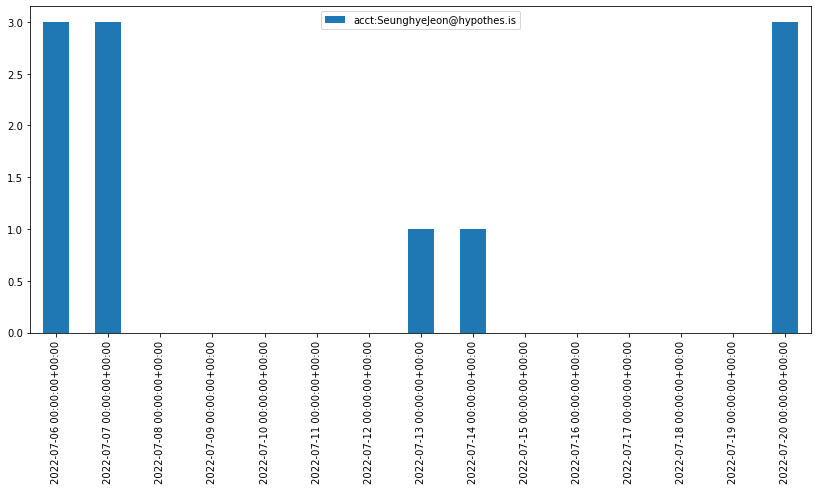

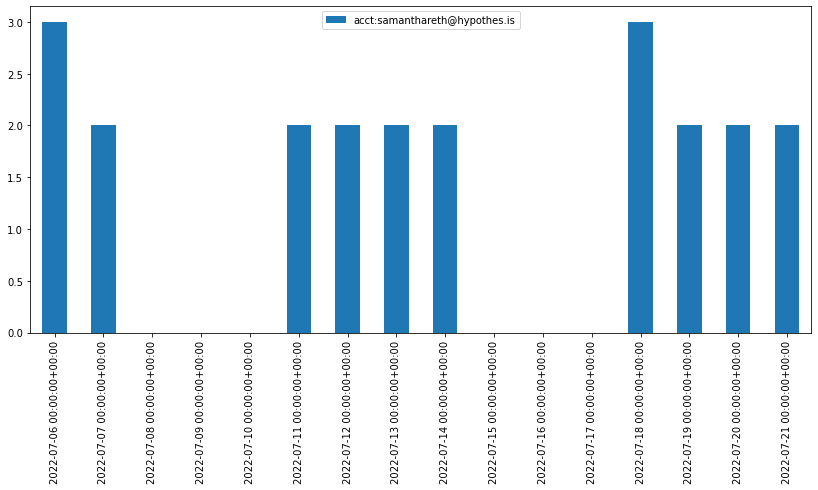

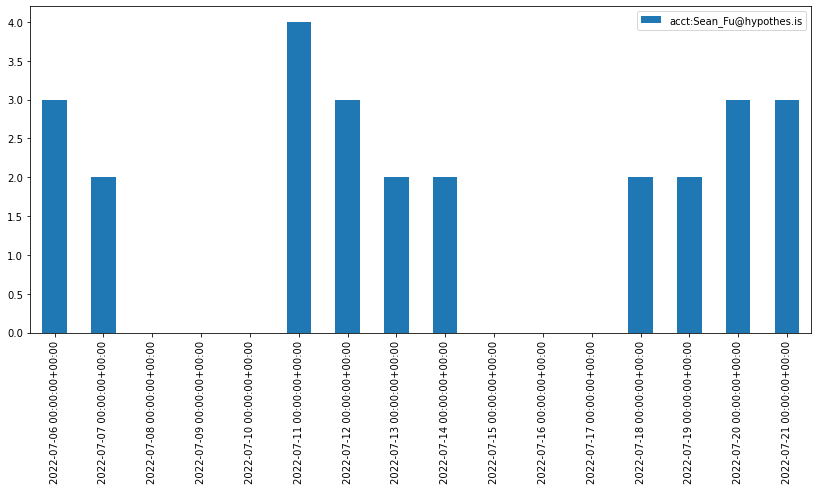

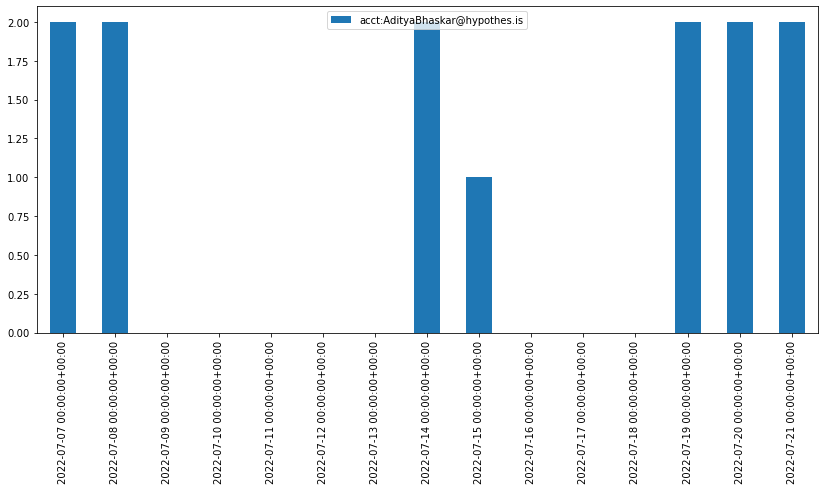

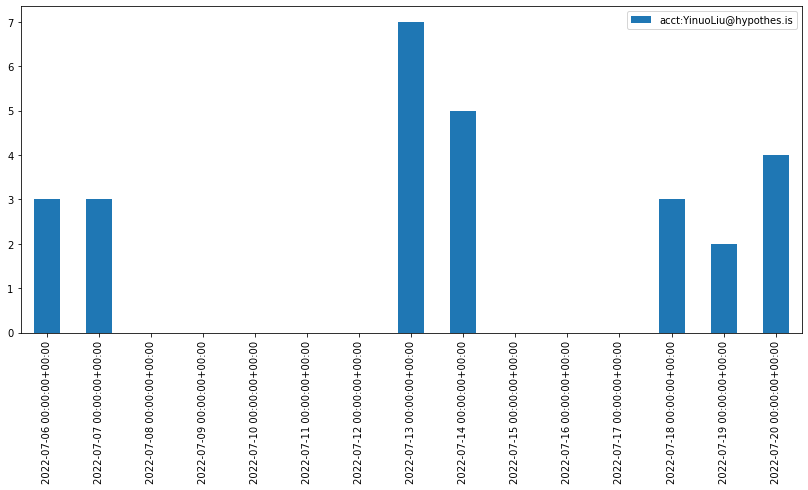

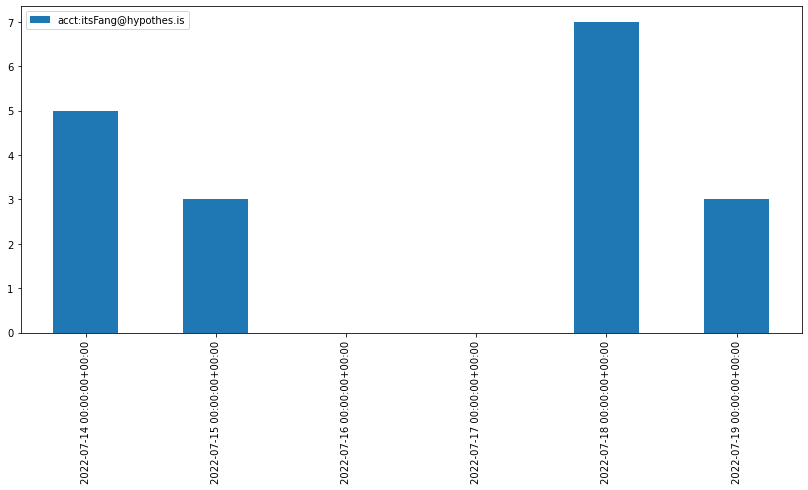

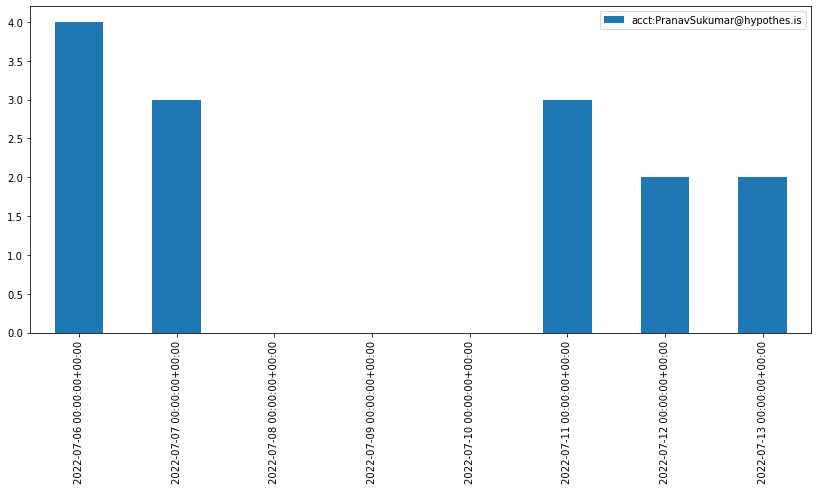

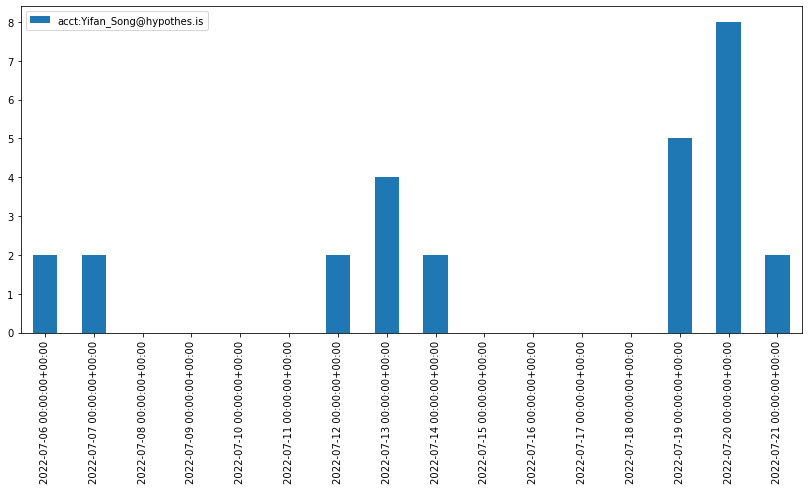

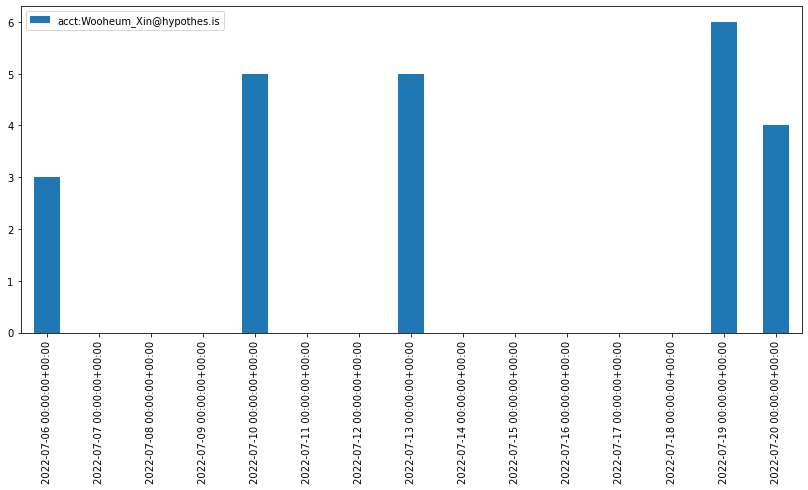

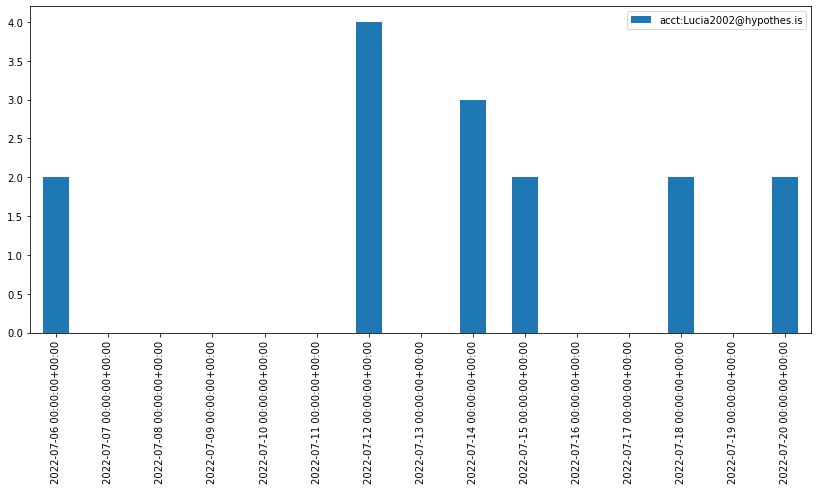

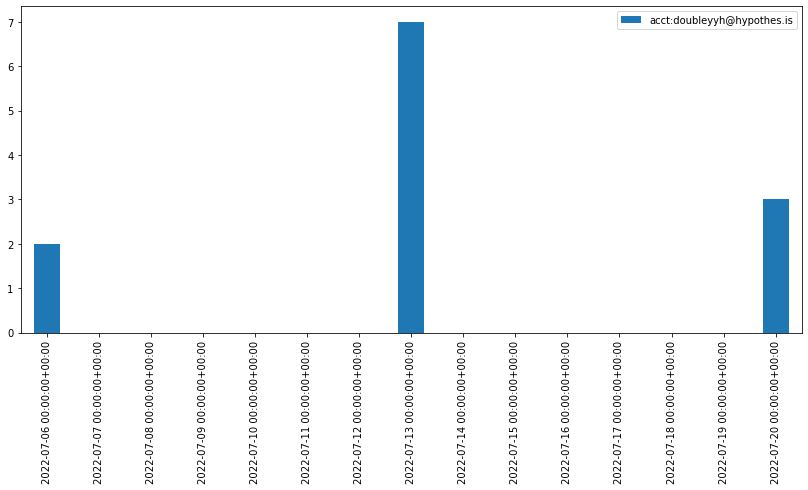

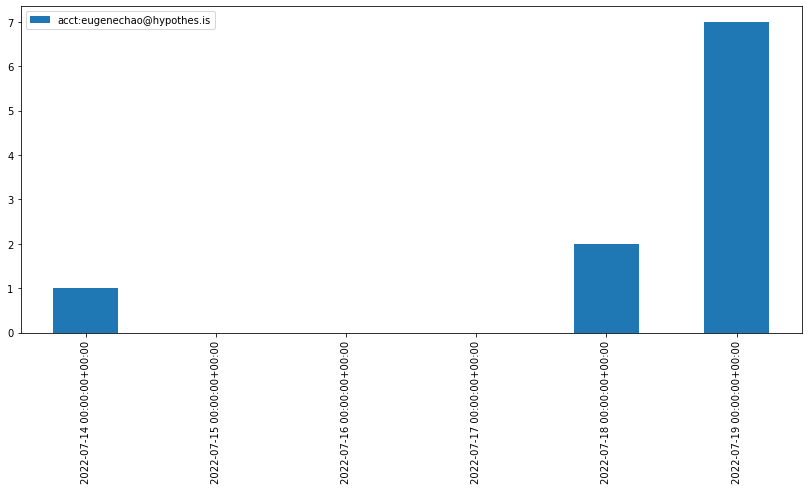

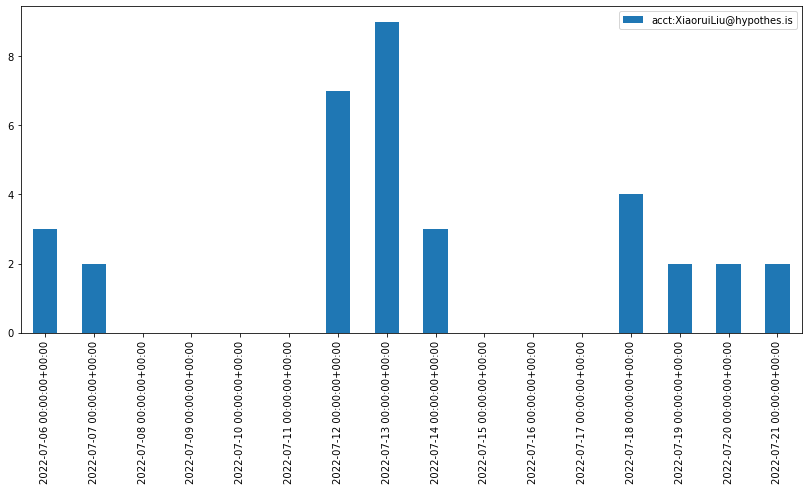

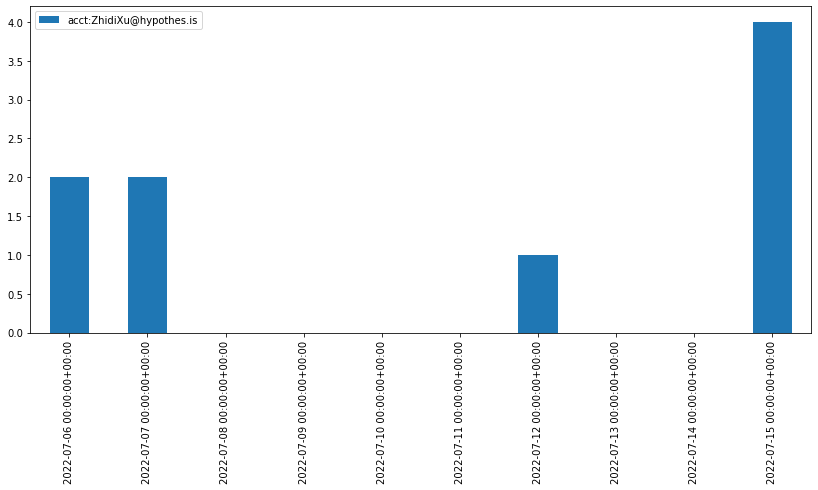

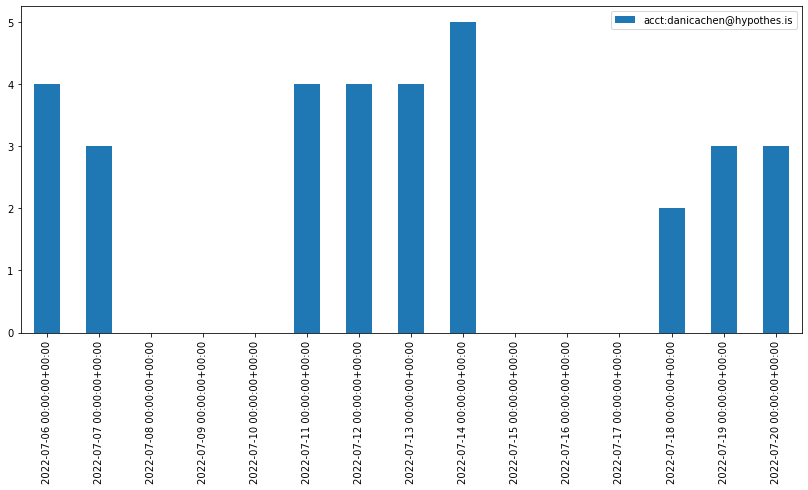

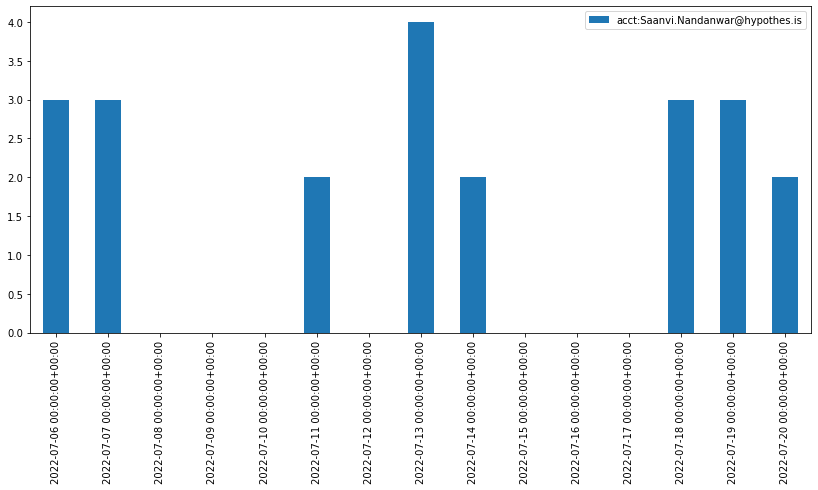

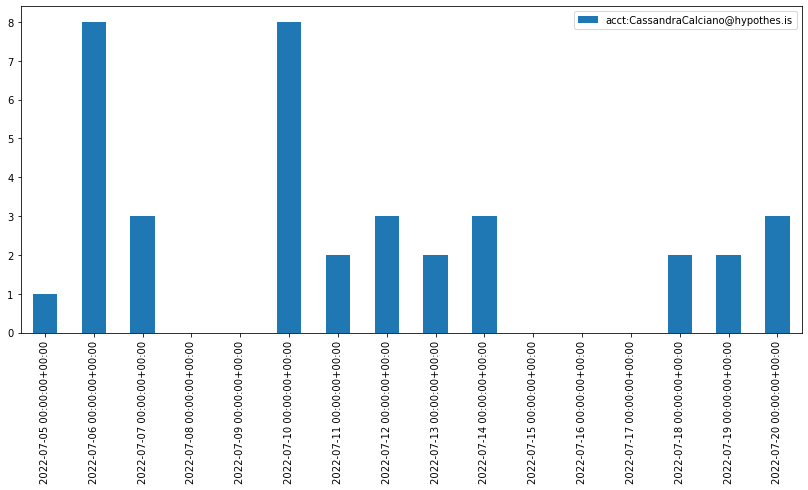

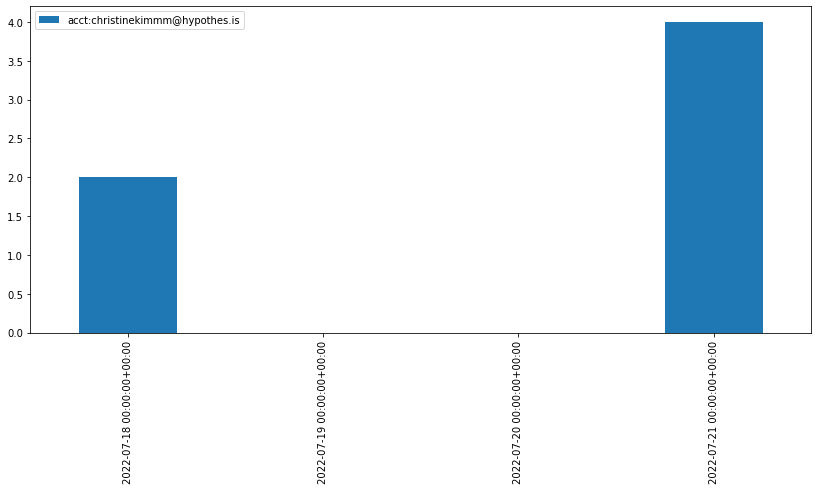

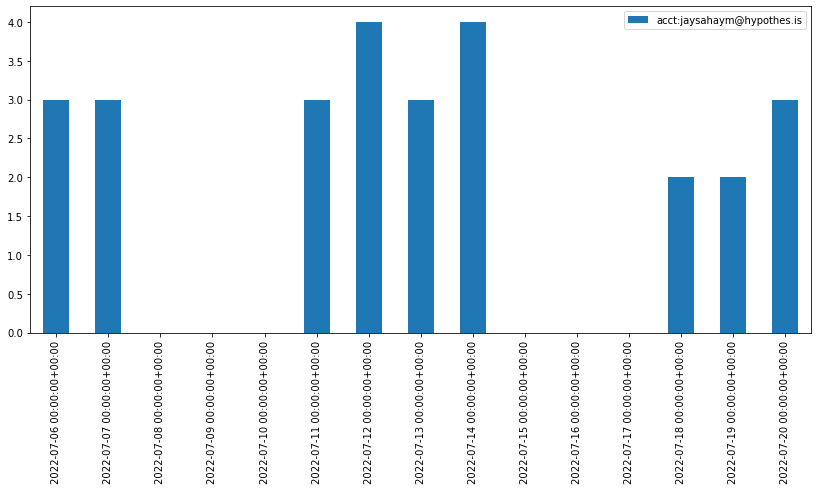

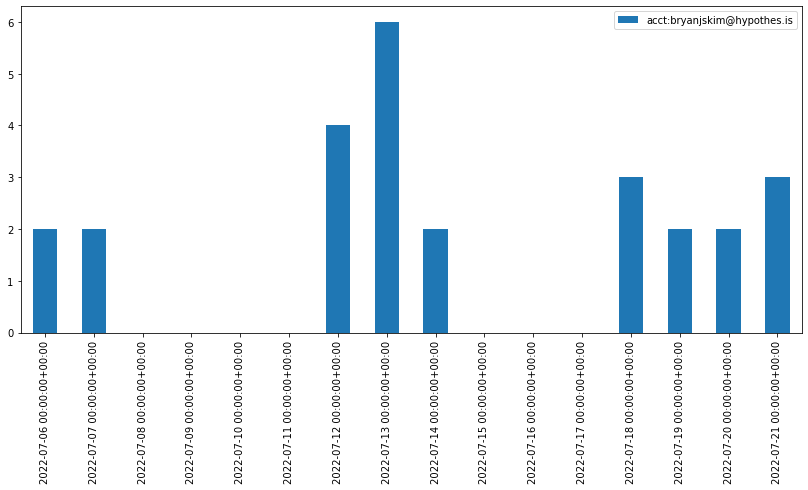

In [12]:
for user in users: 
    print(plotUser(user).sum())

# What kinds of things do I say in my annotations? 

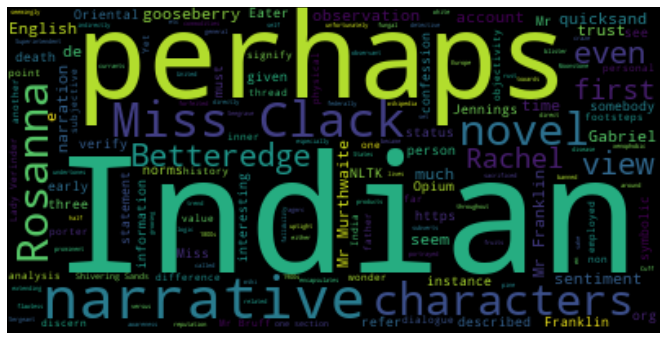

In [10]:
makeWordCloud(myUsername)

# How often did I annotate on each day? 

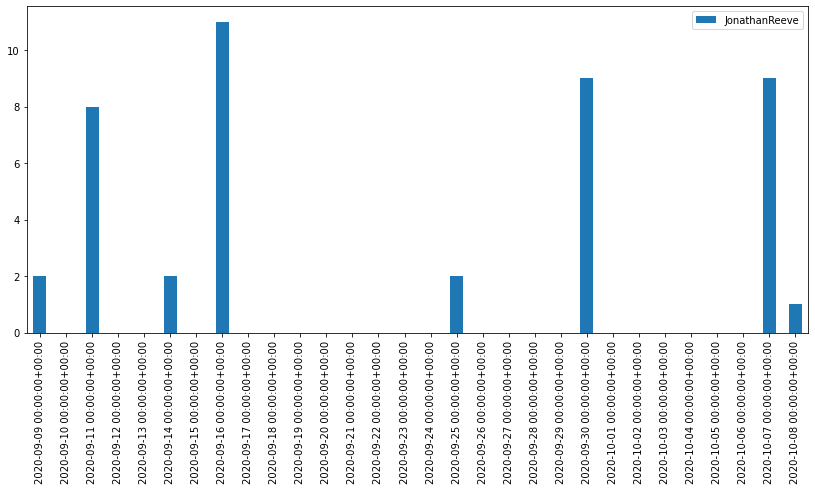

In [12]:
df = plotUser(myUsername)

# What kinds of words did I tend to highlight in my annotations? 

In [48]:
def getHighlighted(username): 
    myAnnotations = getUserAnnotations('JonathanReeve')
    myTargets = [annotation['target'] for annotation in myAnnotations['rows']]
    highlights = []
    for target in myTargets: 
        for innerTarget in target: 
            if 'selector' in innerTarget: 
                selector = innerTarget['selector']
                for innerSelector in selector:
                    if 'type' in innerSelector:
                        # This is starting to get really annoying
                        if innerSelector['type'] == 'TextQuoteSelector':
                            highlightedText = innerSelector['exact']
                            highlights.append(highlightedText)
    myWordcloud = wordcloud.WordCloud().generate(' '.join(highlights))
    plt.imshow(myWordcloud, interpolation='bilinear')
    plt.axis("off")

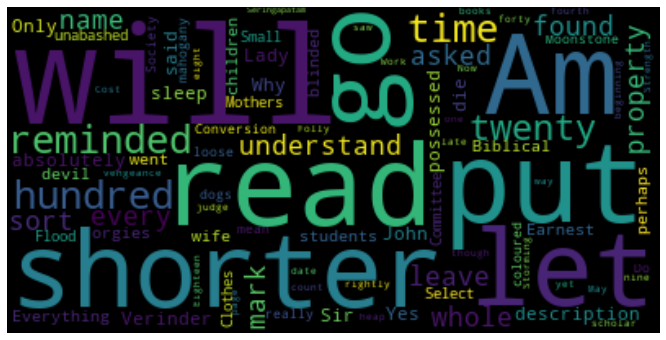

In [76]:
getHighlighted(myUsername)

# What characters do I like to talk about the most? 

In [83]:
myAnnotations = getAnnotations(myUsername)

In [84]:
myTokens = nltk.word_tokenize(' '.join(myAnnotations).lower())

In [85]:
charCounts = {character: collections.Counter(myTokens)[character] 
              for character in ['clack', 'betteredge', 'godfrey', 'blake', 'franklin', 'rachel', 'bruff']}

<AxesSubplot:>

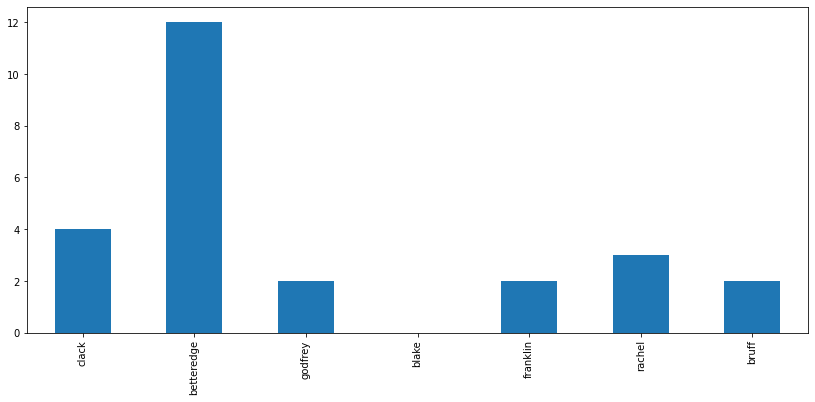

In [86]:
pd.Series(charCounts).plot(kind='bar')